## <center>Exercises 6: 1D Ising model</center>

This notebook is about the one-dimensional Ising model: we have a system made up of $N=50$ spins with nearest neighbour interaction (every particle interacts only with its neighbours) and we want to simulate its behaviour. 
<br> The model, in units $\mu_B=k_B=1$, has Hamiltonian
$$H = -J\sum_{i=1}^N s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$
where $\{ s_i \}_{i=1,N}$ are the values of each spin ($-1$ or $+1$), $h$ is the external field and $J>0$ (ferromagnetic model); in our simulations we will work with periodic boundary conditions, namely we will assume that $s_{N+1} = s_{1}$.
<br> This model is analytically solvable, because the partition function $Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right)$ from which we can derive all the thermodynamic quantities can be computed exactly. 
<br> We are interested in the evaluation of internal energy, heat capacity, magnetic susceptibility and magnetization. through our simulations of the model we are going to compute these quantities at different values of temperature $T$ and find out how they depend on it.

In [12]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Exercise 1

We are going to simulate the model by sampling the Boltzmann weight $p(\{ s_i \}) = \exp(-\beta H)/Z$; in order to do so, we are going to use both the Metropolis algorithm and the Gibbs algorithm.

<br> The Metropolis algorithm consists of making an attempt of moving (in this case a move will be trying to flip all the spins once) and deciding whether to accept it as the new configuration or to reject it staying in the old one by following an acceptance probability 
$$A(new|old)= min\{1,p_{new}/p_{old}\}$$
where $p$ is the probability we are sampling.
<br> The algorithm generates a Markov chain of configurations that, after what will be an amount of equilibration moves, samples the given probability distribution. 

<br> The Gibbs algorithm, instead, is based on the computation of the conditional probability: we are going to sample our configurations following the conditional probability of a spin $i$ to be $+1$ or $-1$ given all the values of the other spins. Here every move is accepted: in fact, we eplore all the spins deciding for each one whether to make it $+1$ or $-1$ following this conditional probability, the old configuration does not take part in this choice.

While sampling the Boltzmann weight with these two methods, we are going to estimate the values of the quantities exposed before as the average of their evaluations in the sampled configurations. We are going to use data blocking to estimate the uncertainties: we are going to take $M=10^5$ Monte Carlo steps, divided into $N=100$ blocks of $L=1000$ steps each.

We will follow this procedure for different temperatures in the range $\left[0.5,2.0\right]$ for a system of $N=50$ spins with $J=1$ and plot the evaluation of the quantities of interest after the $M$ Monte Carlo steps as a function of the temperature, in order to compare both the Metropolis and the Gibbs simulations with the exact model.
<br> The quantities we are going to compute are the following:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

For every temperature first we need to equilibrate the system: starting from a random configuration of the $50$ spins, we will begin the simulation and wait for the properties to stabilize. The steps required for equilibration in both cases seem to be around $2000$.
<br> Now we can start the actual simulation, for which I have used $100$ blocks of $1000$ steps each for every temperature. All properties have been simulated in the case $h=0$, except for magnetization that has been computed with $h=0.02$.

The figures below show the results of the simulation of the Ising model with the Metropolis and the Gibbs algorithm for a specific temperature $T=1$. This is a first useful step in order to see if we are sampling the Boltzmann weight correctly with the two algorithms: from a comparison with the exact quantities (see later) we can state that both algorithms are working well.

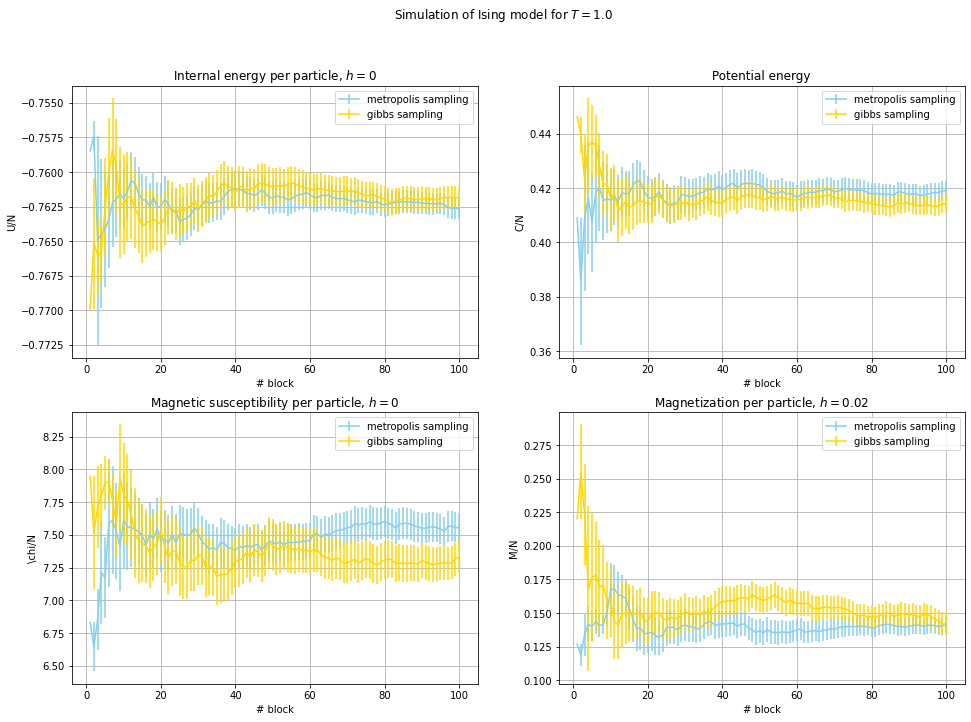

In [14]:
# reading my data

nblk, ene_metro, error_ene_metro = np.loadtxt("ex_1/Metropolis/output.ene", usecols=(0,2,3), delimiter=None, unpack='true')
ene_gibbs, error_ene_gibbs = np.loadtxt("ex_1/Gibbs/output.ene", usecols=(2,3), delimiter=None, unpack='true')

heat_metro, error_heat_metro = np.loadtxt("ex_1/Metropolis/output.heat", usecols=(2,3), delimiter=None, unpack='true')
heat_gibbs, error_heat_gibbs = np.loadtxt("ex_1/Gibbs/output.heat", usecols=(2,3), delimiter=None, unpack='true')

chi_metro, error_chi_metro = np.loadtxt("ex_1/Metropolis/output.chi", usecols=(2,3), delimiter=None, unpack='true')
chi_gibbs, error_chi_gibbs = np.loadtxt("ex_1/Gibbs/output.chi", usecols=(2,3), delimiter=None, unpack='true')

mag_metro, error_mag_metro = np.loadtxt("ex_1/Metropolis/output.mag", usecols=(2,3), delimiter=None, unpack='true')
mag_gibbs, error_mag_gibbs = np.loadtxt("ex_1/Gibbs/output.mag", usecols=(2,3), delimiter=None, unpack='true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,11))
fig.suptitle('Simulation of Ising model for $T=1.0$')

ax1.errorbar(nblk,ene_metro,yerr=error_ene_metro,color='skyblue',label='metropolis sampling')
ax1.errorbar(nblk,ene_gibbs,yerr=error_ene_gibbs,color='gold',label='gibbs sampling')
ax1.set_xlabel('# block')
ax1.set_ylabel('U/N')
ax1.set_title('Internal energy per particle, $h=0$')
ax1.legend(loc='best')
ax1.grid(True)

ax2.errorbar(nblk,heat_metro,yerr=error_heat_metro,color='skyblue',label='metropolis sampling')
ax2.errorbar(nblk,heat_gibbs,yerr=error_heat_gibbs,color='gold',label='gibbs sampling')
ax2.set_xlabel('# block')
ax2.set_ylabel('C/N')
ax2.set_title('Potential energy')
ax2.legend(loc='best')
ax2.grid(True)

ax3.errorbar(nblk,chi_metro,yerr=error_chi_metro,color='skyblue',label='metropolis sampling')
ax3.errorbar(nblk,chi_gibbs,yerr=error_chi_gibbs,color='gold',label='gibbs sampling')
ax3.set_xlabel('# block')
ax3.set_ylabel('\chi/N')
ax3.set_title('Magnetic susceptibility per particle, $h=0$')
ax3.legend(loc='best')
ax3.grid(True)

ax4.errorbar(nblk,mag_metro,yerr=error_mag_metro,color='skyblue',label='metropolis sampling')
ax4.errorbar(nblk,mag_gibbs,yerr=error_mag_gibbs,color='gold',label='gibbs sampling')
ax4.set_xlabel('# block')
ax4.set_ylabel('M/N')
ax4.set_title('Magnetization per particle, $h=0.02$')
ax4.legend(loc='best')
ax4.grid(True)

plt.show()

Now we are going to simulate the system for different temperatures as explained before, in order to see how the quantities of interest behave depending on temperature: we are going to run the simulation that gave us the previous results for temperatures $2.0,1.9,1.8,...,0.5$, starting from a random configuration of spins at $T=2.0$ and decreasing $T$ before running the next simulation; every simulation will start from the final configuration of spins of the previous one. We are going to follow this procedure in the Metropolis case and in the Gibbs case, and both for $h=0$ and $h=0.02$.
<br> In the following graphs we are going to make a comparison between the exact solution of the model and the results of our simulations, both in the Metropolis and in the Gibbs cases: our simulations work well, in fact the results are very near the exact solutions.

In [26]:
# exact solution

points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T

J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

e = -J*( th + ch*thN )/( 1 + thN )  #energy
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)    #heat capacity
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)   #magnetic susceptibility

h=0.02 #external field for magnetization
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

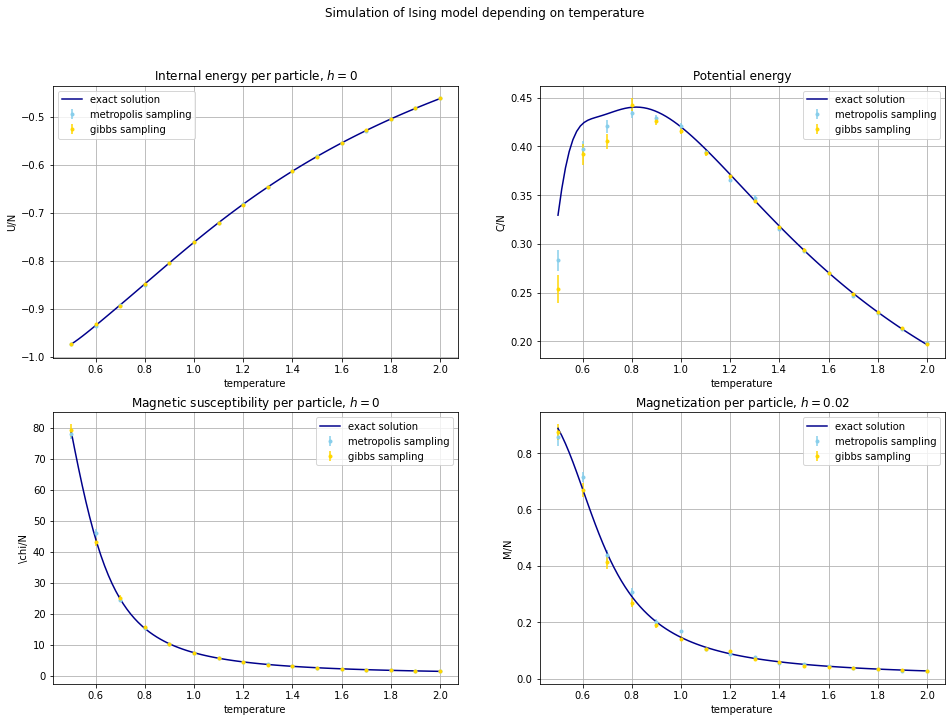

In [27]:
# reading my data

temp = np.loadtxt("ex_1/Metropolis/output.metro_h_0", usecols=(0), delimiter=None, unpack='true')

ene_metro, error_ene_metro = np.loadtxt("ex_1/Metropolis/output.metro_h_0", usecols=(1,2), delimiter=None, unpack='true')
ene_gibbs, error_ene_gibbs = np.loadtxt("ex_1/Gibbs/output.gibbs_h_0", usecols=(1,2), delimiter=None, unpack='true')

heat_metro, error_heat_metro = np.loadtxt("ex_1/Metropolis/output.metro_h_0", usecols=(3,4), delimiter=None, unpack='true')
heat_gibbs, error_heat_gibbs = np.loadtxt("ex_1/Gibbs/output.gibbs_h_0", usecols=(3,4), delimiter=None, unpack='true')

chi_metro, error_chi_metro = np.loadtxt("ex_1/Metropolis/output.metro_h_0", usecols=(5,6), delimiter=None, unpack='true')
chi_gibbs, error_chi_gibbs = np.loadtxt("ex_1/Gibbs/output.gibbs_h_0", usecols=(5,6), delimiter=None, unpack='true')

mag_metro, error_mag_metro = np.loadtxt("ex_1/Metropolis/output.metro_h_002", usecols=(7,8), delimiter=None, unpack='true')
mag_gibbs, error_mag_gibbs = np.loadtxt("ex_1/Gibbs/output.gibbs_h_002", usecols=(7,8), delimiter=None, unpack='true')

#temp = temp.sort()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,11))
fig.suptitle('Simulation of Ising model depending on temperature')

ax1.plot(T,e,color='darkblue',label='exact solution')
ax1.errorbar(temp,ene_metro,yerr=error_ene_metro,fmt='.',color='skyblue',label='metropolis sampling')
ax1.errorbar(temp,ene_gibbs,yerr=error_ene_gibbs,fmt='.',color='gold',label='gibbs sampling')
ax1.set_xlabel('temperature')
ax1.set_ylabel('U/N')
ax1.set_title('Internal energy per particle, $h=0$')
ax1.legend(loc='best')
ax1.grid(True)

ax2.plot(T,heat,color='darkblue',label='exact solution')
ax2.errorbar(temp,heat_metro,yerr=error_heat_metro,fmt='.',color='skyblue',label='metropolis sampling')
ax2.errorbar(temp,heat_gibbs,yerr=error_heat_gibbs,fmt='.',color='gold',label='gibbs sampling')
ax2.set_xlabel('temperature')
ax2.set_ylabel('C/N')
ax2.set_title('Potential energy')
ax2.legend(loc='best')
ax2.grid(True)

ax3.plot(T,X,color='darkblue',label='exact solution')
ax3.errorbar(temp,chi_metro,yerr=error_chi_metro,fmt='.',color='skyblue',label='metropolis sampling')
ax3.errorbar(temp,chi_gibbs,yerr=error_chi_gibbs,fmt='.',color='gold',label='gibbs sampling')
ax3.set_xlabel('temperature')
ax3.set_ylabel('\chi/N')
ax3.set_title('Magnetic susceptibility per particle, $h=0$')
ax3.legend(loc='best')
ax3.grid(True)

ax4.plot(T,M,color='darkblue',label='exact solution')
ax4.errorbar(temp,mag_metro,yerr=error_mag_metro,fmt='.',color='skyblue',label='metropolis sampling')
ax4.errorbar(temp,mag_gibbs,yerr=error_mag_gibbs,fmt='.',color='gold',label='gibbs sampling')
ax4.set_xlabel('temperature')
ax4.set_ylabel('M/N')
ax4.set_title('Magnetization per particle, $h=0.02$')
ax4.legend(loc='best')
ax4.grid(True)

plt.show()